# Kaggle:  Home Credit Default Risk

### Background:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Submission Format
SK_ID_CURR, TARGET  (probability)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
PATH = 'data/cddiscount/'

View files in directory

In [80]:
import os

In [81]:
os.listdir(PATH)

['HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv.zip',
 'bureau_feat_final.csv',
 'application_test.csv',
 'credit_card_balance.csv',
 'app_bureau_data.csv',
 'sample_submission.csv.zip',
 'application_train.csv.zip',
 'bureau.csv',
 'bureau_balance.csv.zip',
 'cc_df_final.csv',
 'application_test.csv.zip',
 'installments_payments.csv',
 'previous_application.csv.zip',
 'bureau_balance.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv.zip',
 '.kaggle-cli',
 'application_train.csv',
 'installments_payments.csv.zip',
 'bureau.csv.zip']

## Table exploration and transformation

Application is the main table for the analysis.

In [82]:
app_df = pd.read_csv(PATH + 'application_train.csv')

In [83]:
app_df.shape

(307511, 122)

In [84]:
pd.options.display.max_columns = 122

In [85]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- Missing values will need to be dealt with (numeric and categorical).
- May not need to use all columns.
- Columns like birthday will need to be transformed

In [86]:
app_df.columns
#app_df.types

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Target EDA

In [87]:
app_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

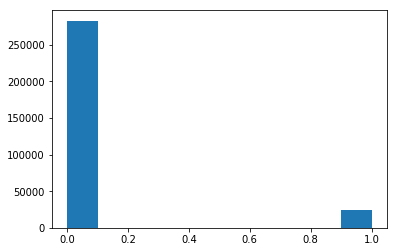

In [88]:
target_plot = plt.hist(app_df['TARGET'])

Around 10% of the applicants defaulted on their loan.

## Bureau Balance
Create min, max, and count of month balance.
Create count of status codes.  Although status codes are not defined, I am guessing some of the codes stand for late or missed payments.

In [89]:
bbal_df = pd.read_csv(PATH + 'bureau_balance.csv')
print(bbal_df.head())
print(bbal_df.shape)

   SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C
(27299925, 3)


#### Create min, max, and count count of MONTHS_BALANCE

In [90]:
bbal_agg = bbal_df.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE': [min,max],
                                               'STATUS': "count"})
bbal_agg.columns = ["_bbal_".join(x) for x in bbal_agg.columns.ravel()]
bbal_agg.head()

,MONTHS_BALANCE_bbal_min,MONTHS_BALANCE_bbal_max,STATUS_bbal_count
SK_ID_BUREAU,,,
5001709,-96,0,97
5001710,-82,0,83
5001711,-3,0,4
5001712,-18,0,19
5001713,-21,0,22


Max appeared to always be 0, but applying the value counts function allowed me to see that there was variation in the column.

In [91]:
bbal_agg['MONTHS_BALANCE_bbal_max'].describe()

count    817395.000000
mean         -7.034154
std          17.026851
min         -96.000000
25%          -1.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: MONTHS_BALANCE_bbal_max, dtype: float64

In [92]:
#bbal_agg.iloc[:,1].value_counts()

#### Count of status codes by SK_ID_BUREAU

In [93]:
#pivot table to get counts by status code
bbal_status_df = bbal_df.pivot_table(index = 'SK_ID_BUREAU',
                    columns = 'STATUS',
                    values = 'MONTHS_BALANCE',
                   aggfunc = 'count')
#rename columns
bbal_status_df.columns = [str(col) + '_bbal_status' for col in bbal_status_df.columns]
#validate
bbal_status_df.head()

,0_bbal_status,1_bbal_status,2_bbal_status,3_bbal_status,4_bbal_status,5_bbal_status,C_bbal_status,X_bbal_status
SK_ID_BUREAU,,,,,,,,
5001709,NaN,NaN,NaN,NaN,NaN,NaN,86.0,11.0
5001710,5.0,NaN,NaN,NaN,NaN,NaN,48.0,30.0
5001711,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5001712,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0


## Bureau Balance Output

In [94]:
bbal_features = pd.merge(bbal_agg, bbal_status_df, left_index=True, right_index=True, how='inner')
bbal_features.head()

,MONTHS_BALANCE_bbal_min,MONTHS_BALANCE_bbal_max,STATUS_bbal_count,0_bbal_status,1_bbal_status,2_bbal_status,3_bbal_status,4_bbal_status,5_bbal_status,C_bbal_status,X_bbal_status
SK_ID_BUREAU,,,,,,,,,,,
5001709,-96,0,97,NaN,NaN,NaN,NaN,NaN,NaN,86.0,11.0
5001710,-82,0,83,5.0,NaN,NaN,NaN,NaN,NaN,48.0,30.0
5001711,-3,0,4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5001712,-18,0,19,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN
5001713,-21,0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0


In [95]:
bbal_features = bbal_features.fillna(0)

# Bureau

In [96]:
bureau_df = pd.read_csv(PATH + 'bureau.csv')

In [97]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [98]:
bureau_df.shape

(1716428, 17)

In [99]:
bureau_df.CREDIT_TYPE.value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

There is one record per applicant per active loan reported by the bureau.  

#### Possible features:
- Active Loan Count
- Sum of active credit amount
- sum of credit_day_overdue
- min credit end date
- max credit date
- STD of credit end dates
- max AMT_Credit_Max_overdue (or avg or count of loans w/ overdue amt)
- Count credit card loans
- count consumer credit loans
- min(days_credit)
- loan type

#### Join bureau balance columns to bureau table prior to additional aggregations and feature creation

In [100]:
bureau_df_pre = pd.merge(bureau_df, bbal_features, left_on='SK_ID_BUREAU', right_index=True, how='left')
bureau_df_pre.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_bbal_min,MONTHS_BALANCE_bbal_max,STATUS_bbal_count,0_bbal_status,1_bbal_status,2_bbal_status,3_bbal_status,4_bbal_status,5_bbal_status,C_bbal_status,X_bbal_status
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create new features from bureau data

In [101]:
#simple aggregation.  additional aggs will be done for active loans only.
bureau_feat_1 = bureau_df_pre.groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':"count",
                                        'DAYS_CREDIT':[min,max],
                                        'CREDIT_DAY_OVERDUE':[min,max],
                                        'DAYS_CREDIT_ENDDATE':max,
                                        'AMT_CREDIT_MAX_OVERDUE':["count",max],
                                        'AMT_CREDIT_SUM':[min,max],
                                        'AMT_CREDIT_SUM_DEBT':[min,max],
                                        '0_bbal_status':sum,
                                        '1_bbal_status':sum,
                                        '2_bbal_status':sum,
                                        '3_bbal_status':sum,
                                        '5_bbal_status':sum,
                                        'C_bbal_status':sum,
                                        'X_bbal_status':sum            
                                        })
bureau_feat_1.columns = ["_bureau_".join(x) for x in bureau_feat_1.columns.ravel()]
#bureau_feat_1.head()

In [102]:
bureau_feat_1.shape

(305811, 19)

In [103]:
#pivot table to get counts by status code
loan_type_cnts = bureau_df.pivot_table(index = 'SK_ID_CURR',
                    columns = 'CREDIT_TYPE',
                    values = 'SK_ID_BUREAU',
                   aggfunc = 'count')
loan_type_cnts.head()

CREDIT_TYPE,Another type of loan,Car loan,Cash loan (non-earmarked),Consumer credit,Credit card,Interbank credit,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mobile operator loan,Mortgage,Real estate loan,Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,
100001,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
loan_type_cnts=loan_type_cnts.fillna(0)

In [105]:
# merge count of credit type with bureau_feat_1
bureau_feat_1 = pd.merge(bureau_feat_1, loan_type_cnts, how = 'inner', left_on='SK_ID_CURR', right_index=True )

In [106]:
# new dataframe with only active loans
bureau_df_active = bureau_df_pre[bureau_df_pre['CREDIT_ACTIVE']=='Active']
bureau_df_active.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_bbal_min,MONTHS_BALANCE_bbal_max,STATUS_bbal_count,0_bbal_status,1_bbal_status,2_bbal_status,3_bbal_status,4_bbal_status,5_bbal_status,C_bbal_status,X_bbal_status
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# create additional features based on active loans only

In [108]:
bureau_actv = bureau_df_active.groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':"count",
                                        'DAYS_CREDIT':[min,max, 'std'],
                                        'CREDIT_DAY_OVERDUE':[min,max, sum],
                                        'DAYS_CREDIT_ENDDATE':[max, min, 'std'],
                                        'AMT_CREDIT_MAX_OVERDUE':["count",max, sum],
                                        'AMT_CREDIT_SUM':[min,max, 'std', sum],
                                        'AMT_CREDIT_SUM_DEBT':[min,max, sum],
                                        '0_bbal_status':sum,
                                        '1_bbal_status':sum,
                                        '2_bbal_status':sum,
                                        '3_bbal_status':sum,
                                        '5_bbal_status':sum,
                                        'C_bbal_status':sum,
                                        'X_bbal_status':sum             
                                        })
bureau_actv.columns = ["_active_".join(x) for x in bureau_actv.columns.ravel()]
bureau_actv.head()

,SK_ID_BUREAU_active_count,DAYS_CREDIT_active_min,DAYS_CREDIT_active_max,DAYS_CREDIT_active_std,CREDIT_DAY_OVERDUE_active_min,CREDIT_DAY_OVERDUE_active_max,CREDIT_DAY_OVERDUE_active_sum,DAYS_CREDIT_ENDDATE_active_max,DAYS_CREDIT_ENDDATE_active_min,DAYS_CREDIT_ENDDATE_active_std,AMT_CREDIT_MAX_OVERDUE_active_count,AMT_CREDIT_MAX_OVERDUE_active_max,AMT_CREDIT_MAX_OVERDUE_active_sum,AMT_CREDIT_SUM_active_min,AMT_CREDIT_SUM_active_max,AMT_CREDIT_SUM_active_std,AMT_CREDIT_SUM_active_sum,AMT_CREDIT_SUM_DEBT_active_min,AMT_CREDIT_SUM_DEBT_active_max,AMT_CREDIT_SUM_DEBT_active_sum,0_bbal_status_active_sum,1_bbal_status_active_sum,2_bbal_status_active_sum,3_bbal_status_active_sum,5_bbal_status_active_sum,C_bbal_status_active_sum,X_bbal_status_active_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,-559,-49,255.167265,0,0,0,1778.0,411.0,692.476955,0,NaN,0.0,168345.000,378000.0,111246.920294,884025.000,110281.5,373239.0,596686.5,24.0,1.0,0.0,0.0,0.0,0.0,7.0
100002,2,-1042,-103,663.973268,0,0,0,780.0,780.0,NaN,1,40.5,40.5,31988.565,450000.0,295578.720302,481988.565,0.0,245781.0,245781.0,7.0,6.0,0.0,0.0,0.0,2.0,5.0
100003,1,-606,-606,NaN,0,0,0,1216.0,1216.0,NaN,1,0.0,0.0,810000.000,810000.0,NaN,810000.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,2,-137,-62,53.033009,0,0,0,1324.0,122.0,849.942351,1,0.0,0.0,29826.000,568800.0,381112.170283,598626.000,25321.5,543087.0,568408.5,7.0,0.0,0.0,0.0,0.0,0.0,1.0
100008,1,-78,-78,NaN,0,0,0,471.0,471.0,NaN,1,0.0,0.0,267606.000,267606.0,NaN,267606.000,240057.0,240057.0,240057.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
bureau_actv = bureau_actv.fillna(0)

In [110]:
#pivot table to get counts by status code
loan_type_cnts_actv = bureau_df_active.pivot_table(index = 'SK_ID_CURR',
                    columns = 'CREDIT_TYPE',
                    values = 'AMT_CREDIT_SUM_DEBT',
                   aggfunc = 'sum',
                    fill_value=0)
loan_type_cnts_actv.head()

CREDIT_TYPE,Another type of loan,Car loan,Cash loan (non-earmarked),Consumer credit,Credit card,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mobile operator loan,Mortgage,Real estate loan,Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,
100001,0.0,0.0,0.0,596686.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,0.0,0.0,0.0,245781.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,0.0,0.0,0.0,568408.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100008,0.0,0.0,0.0,240057.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# merge count of credit type with bureau_actv
bureau_feat_actv = pd.merge(bureau_actv, loan_type_cnts_actv, how = 'inner', left_on='SK_ID_CURR', right_index=True )

#### How many active loans do customers have? 

(array([2.22936e+05, 2.50540e+04, 3.32700e+03, 4.27000e+02, 5.00000e+01,
        1.70000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <a list of 10 Patch objects>)

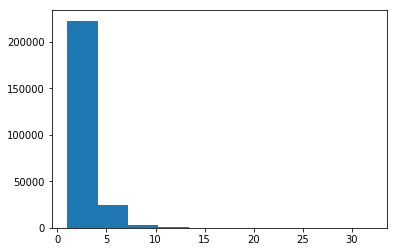

In [112]:
plt.hist(bureau_actv.SK_ID_BUREAU_active_count)

#### Combine active info w/ all info

In [113]:
bureau_feat_final = pd.merge(bureau_feat_1, bureau_feat_actv, how = 'left', left_on='SK_ID_CURR', right_index=True )

In [114]:
bureau_feat_final.head()

,SK_ID_BUREAU_bureau_count,DAYS_CREDIT_bureau_min,DAYS_CREDIT_bureau_max,CREDIT_DAY_OVERDUE_bureau_min,CREDIT_DAY_OVERDUE_bureau_max,DAYS_CREDIT_ENDDATE_bureau_max,AMT_CREDIT_MAX_OVERDUE_bureau_count,AMT_CREDIT_MAX_OVERDUE_bureau_max,AMT_CREDIT_SUM_bureau_min,AMT_CREDIT_SUM_bureau_max,AMT_CREDIT_SUM_DEBT_bureau_min,AMT_CREDIT_SUM_DEBT_bureau_max,0_bbal_status_bureau_sum,1_bbal_status_bureau_sum,2_bbal_status_bureau_sum,3_bbal_status_bureau_sum,5_bbal_status_bureau_sum,C_bbal_status_bureau_sum,X_bbal_status_bureau_sum,Another type of loan_x,Car loan_x,Cash loan (non-earmarked)_x,Consumer credit_x,Credit card_x,Interbank credit,Loan for business development_x,Loan for purchase of shares (margin lending)_x,Loan for the purchase of equipment_x,Loan for working capital replenishment_x,Microloan_x,Mobile operator loan_x,Mortgage_x,Real estate loan_x,Unknown type of loan_x,SK_ID_BUREAU_active_count,DAYS_CREDIT_active_min,DAYS_CREDIT_active_max,DAYS_CREDIT_active_std,CREDIT_DAY_OVERDUE_active_min,CREDIT_DAY_OVERDUE_active_max,CREDIT_DAY_OVERDUE_active_sum,DAYS_CREDIT_ENDDATE_active_max,DAYS_CREDIT_ENDDATE_active_min,DAYS_CREDIT_ENDDATE_active_std,AMT_CREDIT_MAX_OVERDUE_active_count,AMT_CREDIT_MAX_OVERDUE_active_max,AMT_CREDIT_MAX_OVERDUE_active_sum,AMT_CREDIT_SUM_active_min,AMT_CREDIT_SUM_active_max,AMT_CREDIT_SUM_active_std,AMT_CREDIT_SUM_active_sum,AMT_CREDIT_SUM_DEBT_active_min,AMT_CREDIT_SUM_DEBT_active_max,AMT_CREDIT_SUM_DEBT_active_sum,0_bbal_status_active_sum,1_bbal_status_active_sum,2_bbal_status_active_sum,3_bbal_status_active_sum,5_bbal_status_active_sum,C_bbal_status_active_sum,X_bbal_status_active_sum,Another type of loan_y,Car loan_y,Cash loan (non-earmarked)_y,Consumer credit_y,Credit card_y,Loan for business development_y,Loan for purchase of shares (margin lending)_y,Loan for the purchase of equipment_y,Loan for working capital replenishment_y,Microloan_y,Mobile operator loan_y,Mortgage_y,Real estate loan_y,Unknown type of loan_y
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,7,-1572,-49,0,0,1778.0,0,NaN,85500.0,378000.0,0.0,373239.0,31.0,1.0,0.0,0.0,0.0,110.0,30.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-559.0,-49.0,255.167265,0.0,0.0,0.0,1778.0,411.0,692.476955,0.0,0.0,0.0,168345.000,378000.0,111246.920294,884025.000,110281.5,373239.0,596686.5,24.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,596686.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,8,-1437,-103,0,0,780.0,5,5043.645,0.0,450000.0,0.0,245781.0,45.0,27.0,0.0,0.0,0.0,23.0,15.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1042.0,-103.0,663.973268,0.0,0.0,0.0,780.0,780.0,0.000000,1.0,40.5,40.5,31988.565,450000.0,295578.720302,481988.565,0.0,245781.0,245781.0,7.0,6.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,4,-2586,-606,0,0,1216.0,4,0.000,22248.0,810000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-606.0,-606.0,0.000000,0.0,0.0,0.0,1216.0,1216.0,0.000000,1.0,0.0,0.0,810000.000,810000.0,0.000000,810000.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,2,-1326,-408,0,0,-382.0,1,0.000,94500.0,94537.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,3,-373,-62,0,0,1324.0,1,0.000,29826.0,568800.0,0.0,543087.0,14.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-137.0,-62.0,53.033009,0.0,0.0,0.0,1324.0,122.0,849.942351,1.0,0.0,0.0,29826.000,568800.0,381112.170283,598626.000,25321.5,543087.0,568408.5,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,568408.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
bureau_feat_final.shape

(305811, 75)

In [116]:
#save final bureau features
bureau_feat_final.to_csv(PATH + 'bureau_feat_final.csv')